In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Data/dataset.csv')
df

,T2M,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,WS50M,WS50M_MAX,WS50M_MIN,PM2.5
0,28.29,34.65,23.40,5.95,67.94,5.19,7.70,2.67,34.49
1,29.12,36.17,23.28,2.08,66.56,5.68,7.59,3.39,27.89
2,29.19,36.48,23.39,7.67,67.56,5.38,7.50,3.14,21.64
3,29.26,36.38,23.40,5.68,66.50,5.20,7.64,3.12,23.07
4,30.48,38.27,24.51,2.63,63.50,5.32,7.64,3.66,21.27
...,...,...,...,...,...,...,...,...,...
1390,30.02,37.79,24.98,0.05,65.62,6.88,8.09,4.95,23.73
1391,30.11,38.51,23.83,0.20,65.12,6.16,7.30,5.41,26.85
1392,30.38,38.89,24.24,0.12,64.62,6.84,8.64,5.44,19.72
1393,30.98,39.46,25.00,0.32,64.88,6.47,8.62,3.92,11.15


<AxesSubplot:>

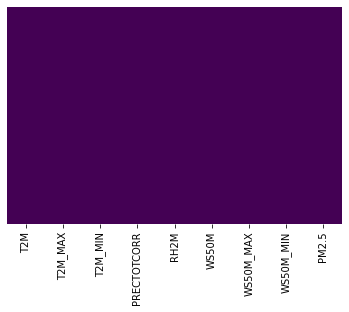

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Train Test split

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor


In [10]:
dtree=DecisionTreeRegressor(criterion="mse")

In [13]:
dtree.fit(X_train,y_train)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [14]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [15]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.5251324922861197


In [16]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='sq

In [17]:
score.mean()

0.27282882672223996

In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

### Tree Visualisation

In [24]:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [25]:
features = list(df.columns[:-1])
features

['T2M',
 'T2M_MAX',
 'T2M_MIN',
 'PRECTOTCORR',
 'RH2M',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN']

### Evaluation

In [26]:
prediction=dtree.predict(X_test)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

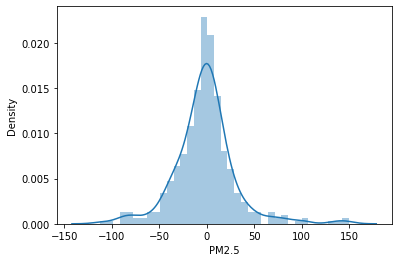

In [27]:
sns.distplot(y_test-prediction)

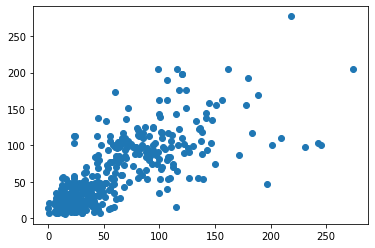

In [28]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning DEcision Tree Regressor

In [30]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [31]:

## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [32]:

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [33]:
random_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(criterion='mse'), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [34]:
random_search.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [35]:
random_search.best_score_


-841.28829641149

In [37]:
predictions=random_search.predict(X_test)

C:\Users\soumo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

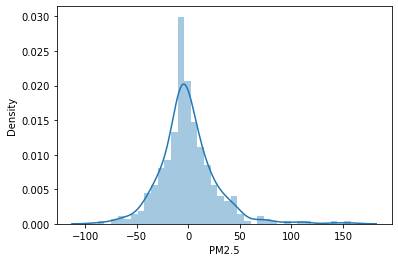

In [38]:
sns.distplot(y_test-predictions)

In [41]:
import numpy as np
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.168924379121297
MSE: 770.6192428665522
RMSE: 27.760029590520112
